In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/chocolate-sales")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chocolate-sales


This project analyzes chocolate sales data to uncover trends in sales by product, country, and salesperson. 
We also explore which products generate the highest revenue and identify patterns over time.

In [ ]:
import os
dataset_path = kagglehub.dataset_download("atharvasoundankar/chocolate-sales")

for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(dataset_path, filename)
        break


Data Overview
- Dataset contains sales information including `Sales Person`, `Country`, `Product`, `Date`, `Amount`, and `Boxes Shipped`.
- First few rows shown above.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(csv_path)
df.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
5,Van Tuxwell,India,Smooth Sliky Salty,06-Jun-22,"$5,376",38
6,Oby Sorrel,UK,99% Dark & Pure,25-Jan-22,"$13,685",176
7,Gunar Cockshoot,Australia,After Nines,24-Mar-22,"$3,080",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20-Apr-22,"$3,990",59
9,Brien Boise,Australia,99% Dark & Pure,04-Jul-22,"$2,835",102


Converted `Date` column to datetime format.

Removed `$` signs and converted `Amount` to float for analysis.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [ ]:
df['Amount'] = (df['Amount'].replace('[\$,]', '', regex=True).astype(float))

In [ ]:
df.tail(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1084,Roddy Speechley,India,50% Dark Bites,2022-03-14,8337.0,12
1085,Barr Faughny,New Zealand,99% Dark & Pure,2022-05-24,8134.0,195
1086,Dennison Crosswaite,Canada,Organic Choco Syrup,2022-01-28,8491.0,75
1087,Beverie Moffet,India,Almond Choco,2022-05-24,3066.0,96
1088,Brien Boise,Australia,Peanut Butter Cubes,2022-08-19,301.0,205
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384
1093,Karlen McCaffrey,India,70% Dark Bites,2022-05-23,5075.0,344


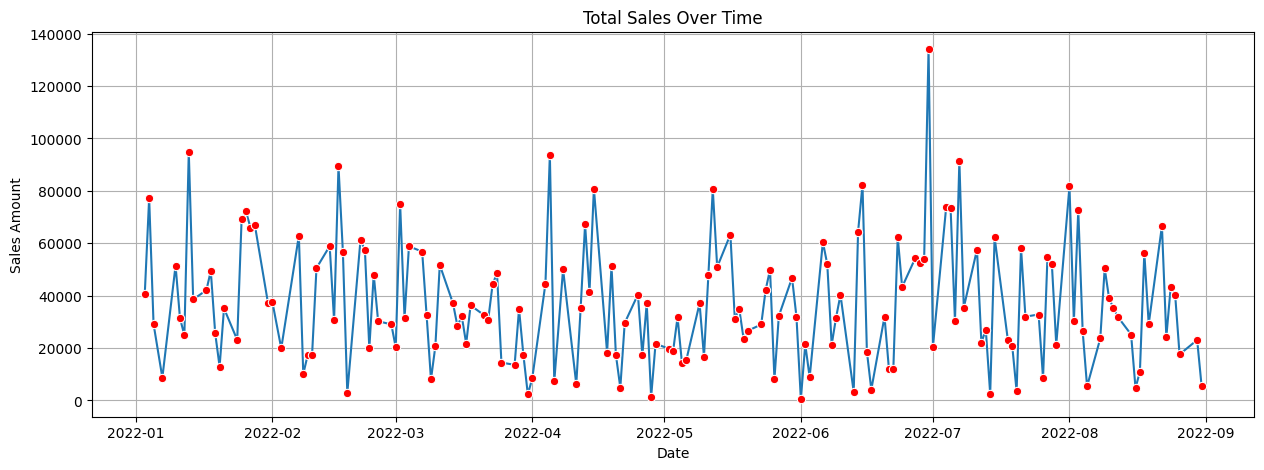

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_grouped = df.groupby('Date')['Amount'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_grouped, x='Date', y='Amount', lw=1.5, marker='o', markerfacecolor='red')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid()
plt.show()

The line chart shows overall sales trends. Peaks indicate periods of high chocolate demand. The highest one was in 2022-07(summer)

In [ ]:
#plt.savefig("plot_of_total_sales.png", dpi=300, bbox_inches='tight')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [ ]:
import numpy as np

df.describe(include = [np.number])

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [ ]:
print(df.groupby("Amount")["Product"].describe())

        count unique                  top freq
Amount                                        
7.0         2      2      99% Dark & Pure    1
28.0        1      1  Peanut Butter Cubes    1
49.0        2      2         Orange Choco    1
63.0        3      3      Mint Chip Choco    1
70.0        2      2       50% Dark Bites    1
...       ...    ...                  ...  ...
19327.0     1      1   Smooth Sliky Salty    1
19453.0     1      1  Organic Choco Syrup    1
19481.0     1      1              Eclairs    1
19929.0     1      1  Organic Choco Syrup    1
22050.0     1      1  Peanut Butter Cubes    1

[827 rows x 4 columns]


In [ ]:
agg_stats = df.agg({
    "Amount": ["min", "max", "mean", "median", "nunique"],
    "Boxes Shipped": ["min", "max", "mean", "nunique"]})
print(agg_stats)

               Amount  Boxes Shipped
min          7.000000       1.000000
max      22050.000000     709.000000
mean      5652.308044     161.797989
median    4868.500000            NaN
nunique    827.000000     385.000000


We can see which chocolate products generated the highest sales. This helps identify top revenue drivers. ANd the highest one was "Peanut butter cubes" that had 22050 sales. Visuallisation will show more about popular products after "Peanut butter cubes"

In [ ]:
choco_max = df.groupby('Product', as_index=False)['Amount'].max()
choco_max = choco_max.sort_values(by='Amount', ascending=False)
choco_max.head()

,Product,Amount
17,Peanut Butter Cubes,22050.0
16,Organic Choco Syrup,19929.0
10,Eclairs,19481.0
19,Smooth Sliky Salty,19327.0
4,After Nines,18697.0


<ipython-input-212-c9671c49086e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product',y='Amount',data=choco_max,palette=sns.cubehelix_palette(start=.5, rot=-.75, dark=0.2, light=0.8, reverse=True))
<ipython-input-212-c9671c49086e>:5: UserWarning: 
The palette list has fewer values (6) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Product',y='Amount',data=choco_max,palette=sns.cubehelix_palette(start=.5, rot=-.75, dark=0.2, light=0.8, reverse=True))


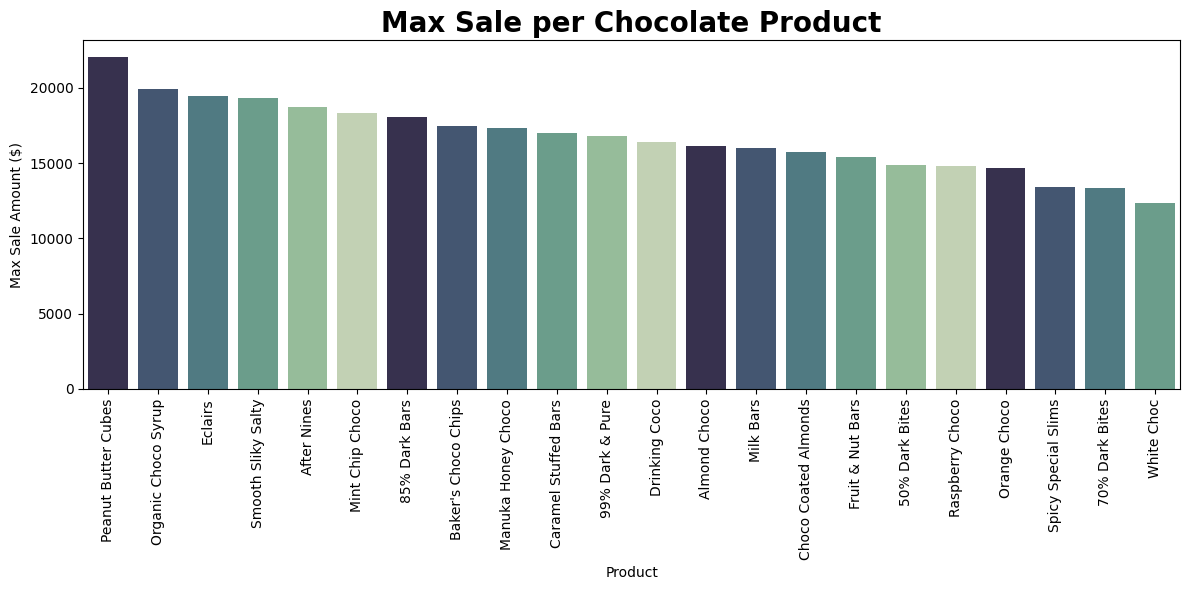

In [ ]:
choco_max = df.groupby('Product', as_index=False)['Amount'].max()
choco_max = choco_max.sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Product',y='Amount',data=choco_max,palette=sns.cubehelix_palette(start=.5, rot=-.75, dark=0.2, light=0.8, reverse=True))
plt.title('Max Sale per Chocolate Product', size=20, fontweight="bold")
plt.xlabel('Product')
plt.ylabel('Max Sale Amount ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#plt.savefig("plot_sale_per_chocolate.png", dpi=300, bbox_inches='tight')

Shows which products are sold most frequently. And in our statistic it is "Eclairs". With information company directly connected with sweets producing may follow trends what supposed to increase revenue and income in future.

In [ ]:
print(df["Product"].value_counts())

Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
85% Dark Bars           50
Fruit & Nut Bars        50
After Nines             50
Peanut Butter Cubes     49
99% Dark & Pure         49
Milk Bars               49
Raspberry Choco         48
Almond Choco            48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64


<ipython-input-196-8e219a6216a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Count', data=sales_counts, palette=sns.color_palette(sns.diverging_palette(250, 30, l=65, center="dark")))
<ipython-input-196-8e219a6216a6>:6: UserWarning: 
The palette list has fewer values (6) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Product', y='Count', data=sales_counts, palette=sns.color_palette(sns.diverging_palette(250, 30, l=65, center="dark")))


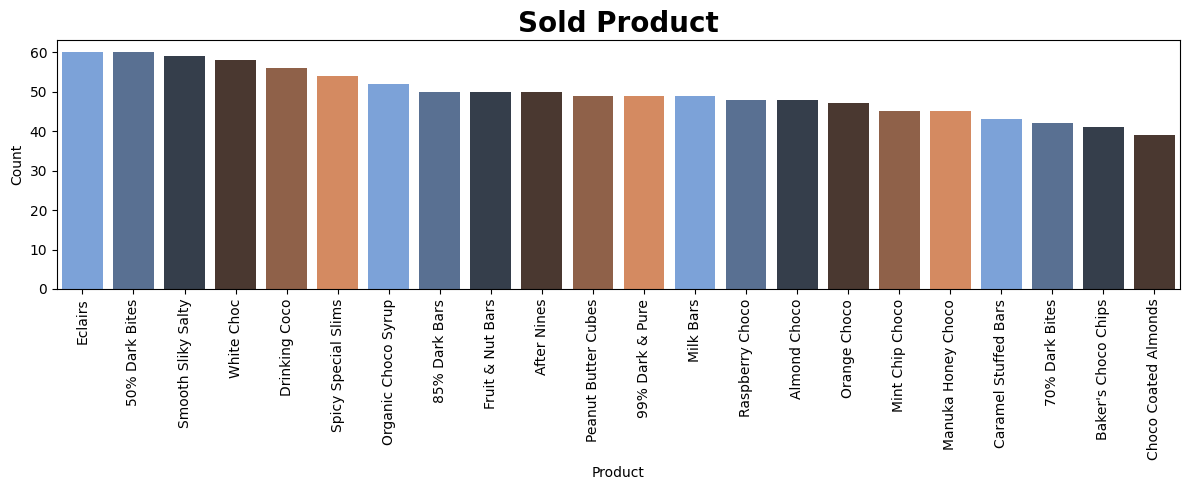

In [ ]:
plt.figure(figsize=(12, 5))

sales_counts = df['Product'].value_counts().reset_index()
sales_counts.columns = ['Product', 'Count']

sns.barplot(x='Product', y='Count', data=sales_counts, palette=sns.color_palette(sns.diverging_palette(250, 30, l=65, center="dark")))
plt.title('Sold Product', size=20, fontweight="bold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#plt.savefig("plot_sold_choco.png", dpi=300, bbox_inches='tight')

In [ ]:
df.sort_values(by=['Country', 'Amount'], ascending=[True, False], kind = "mergesort")[['Country', 'Product', 'Amount']].head()

,Country,Product,Amount
66,Australia,Organic Choco Syrup,19453.0
609,Australia,Mint Chip Choco,17626.0
745,Australia,Choco Coated Almonds,15750.0
58,Australia,Fruit & Nut Bars,15421.0
287,Australia,50% Dark Bites,14889.0


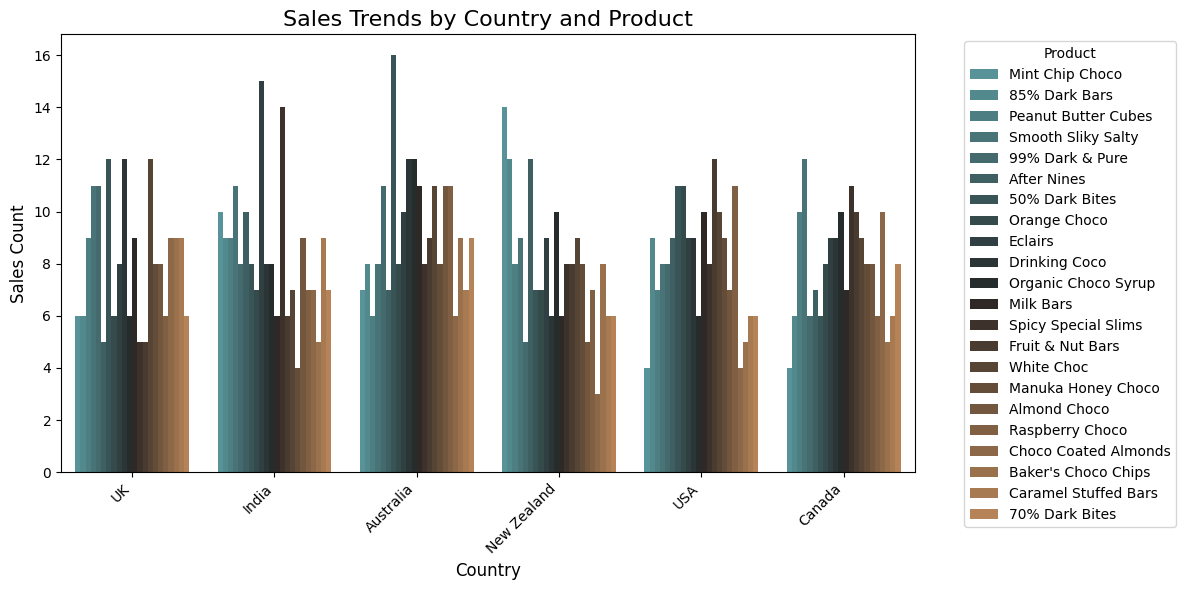

In [ ]:
unique_products = df['Product'].nunique()

plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Product', data=df, palette=sns.color_palette(sns.diverging_palette(200, 40, l=60, center="dark", n=unique_products)))
plt.title('Sales Trends by Country and Product', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This visualization shows the distribution of chocolate sales across countries and products.

In UK citizens prefer drinking coco.

In India citizens prefer organic coco sirup.

In Australia - mint chips choco.

In USA - fruit and nuts bar.

In Canada - smooth silky salty

In [ ]:
#plt.savefig("plot_of_sales_trends.png", dpi=300, bbox_inches='tight')

In [ ]:
sales_amount = df.groupby('Sales Person', as_index=False)['Amount'].sum()
sales_amount = sales_amount.sort_values(by=['Amount'], ascending=[False])
sales_amount.head()

,Sales Person,Amount
5,Ches Bonnell,320901.0
20,Oby Sorrel,316645.0
17,Madelene Upcott,316099.0
3,Brien Boise,312816.0
16,Kelci Walkden,311710.0


In [ ]:
box_amount = df.groupby('Sales Person', as_index=False)['Boxes Shipped'].sum()
box_amount = box_amount.sort_values(by=['Boxes Shipped'], ascending=[False])
box_amount.head()

,Sales Person,Boxes Shipped
15,Karlen McCaffrey,9658
2,Beverie Moffet,9214
7,Dennison Crosswaite,8767
16,Kelci Walkden,8702
20,Oby Sorrel,8608


<ipython-input-226-6daad3e6c6b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Person',y='Amount',data=sales_amount,palette=sns.diverging_palette(9, 50, l=20, s=55),ax=axes[0])
<ipython-input-226-6daad3e6c6b4>:3: UserWarning: 
The palette list has fewer values (6) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Sales Person',y='Amount',data=sales_amount,palette=sns.diverging_palette(9, 50, l=20, s=55),ax=axes[0])
<ipython-input-226-6daad3e6c6b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Person',y='Boxes Shipped',data=box_amount,palette=sns.color_palette("dark:brown", n_colors=10),ax=axes[1])
<ipython-input-226-6daad3e

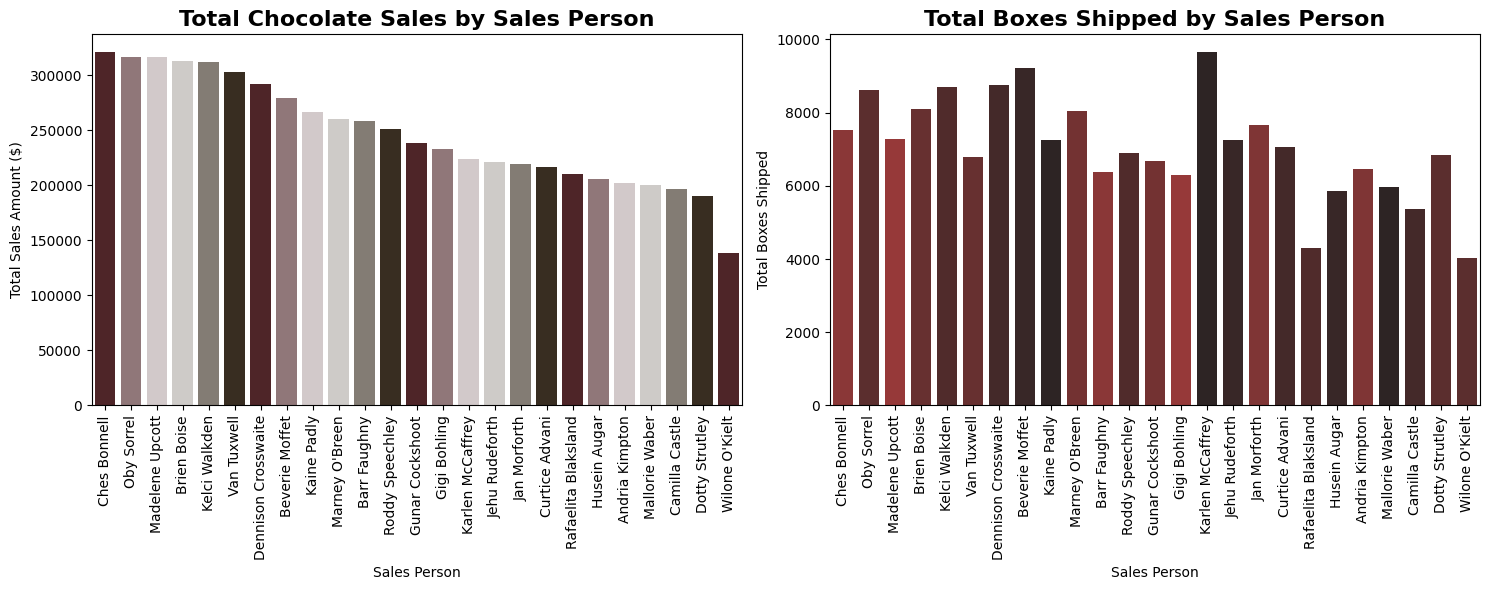

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

sns.barplot(x='Sales Person',y='Amount',data=sales_amount,palette=sns.diverging_palette(9, 50, l=20, s=55),ax=axes[0])
axes[0].set_title('Total Chocolate Sales by Sales Person', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Total Sales Amount ($)')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x='Sales Person',y='Boxes Shipped',data=box_amount,palette=sns.color_palette("dark:brown", n_colors=10),ax=axes[1])
axes[1].set_title('Total Boxes Shipped by Sales Person', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Sales Person')
axes[1].set_ylabel('Total Boxes Shipped')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Shows top-performing salespeople by revenue and number of boxes shipped.

In [ ]:
#plt.savefig("plot_of_total_choco_and_boxes.png", dpi=300, bbox_inches='tight')

## Key Insights
- Best-selling products: Eclairs, 50% Dark Bites, Smooth Sliky Salty.
- Highest revenue product: [Product name from chart].
- Top salesperson: Ches Bonnell with $320,901 in total sales.
- Sales peak at [specific months], indicating seasonal trends.
